# EDA

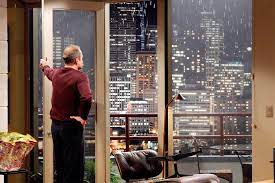

In [232]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [233]:
house_sales = pd.read_csv('data/house_sales.csv')
house_details = pd.read_csv('data/house_details.csv')


In [234]:
house_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


In [235]:
house_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


In [236]:
house_sales.info()
house_sales['house_id'].duplicated().value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB


house_id
False    21420
True       177
Name: count, dtype: int64

In [237]:
house_details.info()
house_details.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [238]:
# import missingno
import missingno as msno

In [239]:
house_sales.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [240]:

house_details.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Calculate price by area

In [255]:
#step 1 join tables
house_details.rename(columns={'id': 'house_id'}, inplace=True)
house_details.columns
house_details_unique = house_details.drop_duplicates(subset=['house_id'])
house_sales_unique = house_sales.drop_duplicates(subset=['house_id'])


df_house_info = pd.merge(house_details_unique,house_sales_unique,how='inner',on='house_id')
df_house_info.info()
df_house_info['date']=pd.to_datetime(df_house_info['date'])
df_house_info['year']=df_house_info['date'].dt.year
df_house_info['zipcode'].unique() 


# 邮编与对应区域的映射关系
zipcode_to_area = {
    '98002': 'Auburn',
    '98155': 'Shoreline',
    '98188': 'Tukwila',
    '98059': 'Renton',
    '98118': 'Seattle',
    '98003': 'Federal Way',
    '98023': 'Federal Way',
    '98117': 'Seattle',
    '98034': 'Kirkland',
    '98022': 'Enumclaw',
    '98116': 'Seattle',
    '98001': 'Auburn',
    '98010': 'Black Diamond',
    '98198': 'Des Moines',
    '98042': 'Kent',
    '98038': 'Maple Valley',
    '98027': 'Issaquah',
    '98045': 'North Bend',
    '98144': 'Seattle',
    '98029': 'Issaquah',
    '98075': 'Sammamish',
    '98199': 'Seattle',
    '98107': 'Seattle',
    '98105': 'Seattle',
    '98052': 'Redmond',
    '98053': 'Redmond',
    '98014': 'Carnation',
    '98077': 'Woodinville',
    '98115': 'Seattle',
    '98011': 'Bothell',
    '98008': 'Bellevue',
    '98019': 'Duvall',
    '98092': 'Auburn',
    '98074': 'Sammamish',
    '98030': 'Kent',
    '98103': 'Seattle',
    '98004': 'Bellevue',
    '98126': 'Seattle',
    '98177': 'Seattle',
    '98056': 'Renton',
    '98133': 'Seattle',
    '98112': 'Seattle',
    '98033': 'Kirkland',
    '98028': 'Kenmore',
    '98007': 'Bellevue',
    '98005': 'Bellevue',
    '98136': 'Seattle',
    '98031': 'Kent',
    '98032': 'Kent',
    '98168': 'Seattle',
    '98006': 'Bellevue',
    '98178': 'Seattle',
    '98072': 'Woodinville',
    '98102': 'Seattle',
    '98125': 'Seattle',
    '98146': 'Seattle',
    '98166': 'Seattle',
    '98122': 'Seattle',
    '98070': 'Vashon',
    '98148': 'Seattle',
    '98040': 'Mercer Island',
    '98106': 'Seattle',
    '98065': 'Snoqualmie',
    '98108': 'Seattle',
    '98058': 'Renton',
    '98024': 'Fall City',
    '98055': 'Renton',
    '98109': 'Seattle',
    '98119': 'Seattle',
    '98039': 'Medina'
}

# 将邮编映射到对应区域，并创建新列
df_house_info['zipcode'] = df_house_info['zipcode'].astype(str)
df_house_info['area'] = df_house_info['zipcode'].map(zipcode_to_area)
df_house_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

In [256]:
df_house_info['condition'].unique()


array([3, 5, 4, 2, 1])

In [257]:
df_house_info['grade'].unique()

array([ 7,  6,  8, 10,  5,  9, 11, 13, 12,  4,  3])

In [258]:
df_house_info['year'].unique()

array([2014, 2015], dtype=int32)

In [260]:
df_house_info.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'id', 'year', 'area'],
      dtype='object')

In [281]:
#step 2 Calculate average price
df_avg_price = pd.DataFrame()
df_avg_price['house_id'] = df_house_info['house_id']
df_avg_price['zipcode'] = df_house_info['zipcode']
df_avg_price['sqft_living'] = df_house_info['sqft_living']*0.092903
df_avg_price['avg_price_living'] = df_house_info['price'] / df_house_info['sqft_living']
df_avg_price['sqft_lot'] = df_house_info['sqft_lot']*0.092903
df_avg_price['avg_price_lot'] = df_house_info['price'] / df_house_info['sqft_lot']
df_avg_price['lat'] = df_house_info['lat']
df_avg_price['long'] = df_house_info['long']
df_avg_price['area'] = df_house_info['area']
df_avg_price['price'] = df_house_info['price']
df_avg_price.drop_duplicates(subset=['house_id'])
df_count_by_zipcode = df_avg_price.groupby('area')['house_id'].count().reset_index()

df_count_by_zipcode.rename(columns={'house_id':'count'},inplace=True)
df_avg_price.describe()

,house_id,sqft_living,avg_price_living,sqft_lot,avg_price_lot,lat,long,price
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000
mean,4580939869.158,193.529,263.953,1405.440,89.144,47.560,-122.214,540739.304
std,2876761172.448,85.360,109.886,3858.336,94.282,0.139,0.141,367931.110
min,1000102.000,34.374,87.588,48.310,0.163,47.156,-122.519,78000.000
25%,2123537386.750,132.851,182.143,468.231,33.366,47.471,-122.328,322500.000
50%,3904921185.000,178.374,244.526,707.363,59.375,47.572,-122.230,450000.000
75%,7308900186.250,236.903,318.182,993.180,107.683,47.678,-122.125,645000.000
max,9900000190.000,1257.907,800.000,153416.205,2019.704,47.778,-121.315,7700000.000


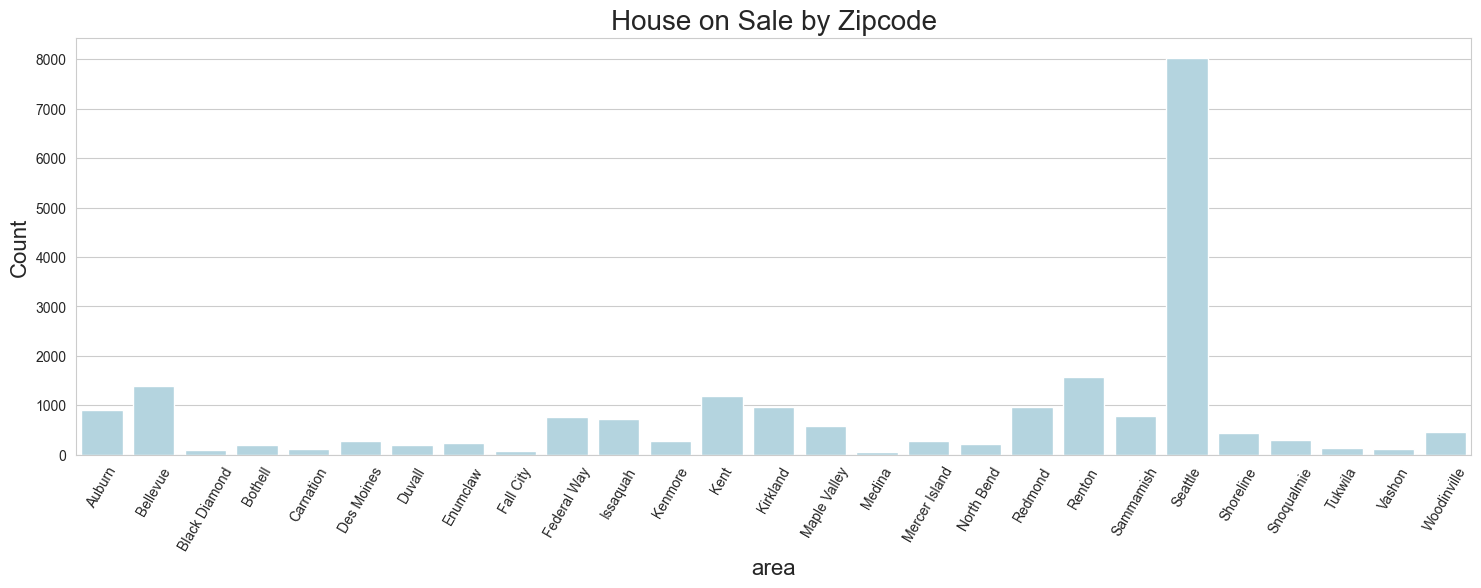

In [265]:
plt.figure(figsize=(18,3))
sns.set_style('whitegrid')
sns.barplot(x='area',y='count',data=df_count_by_zipcode,color = 'lightblue')

plt.title('House on Sale by Zipcode',fontsize = 20)
plt.xlabel('area',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.xticks(rotation=60)
plt.subplots_adjust(top=1.5)



In [272]:

df_avg_price_median = df_avg_price.groupby('area')[['avg_price_living', 'avg_price_lot']].median().reset_index()
df_avg_price_median.columns

Index(['area', 'avg_price_living', 'avg_price_lot'], dtype='object')

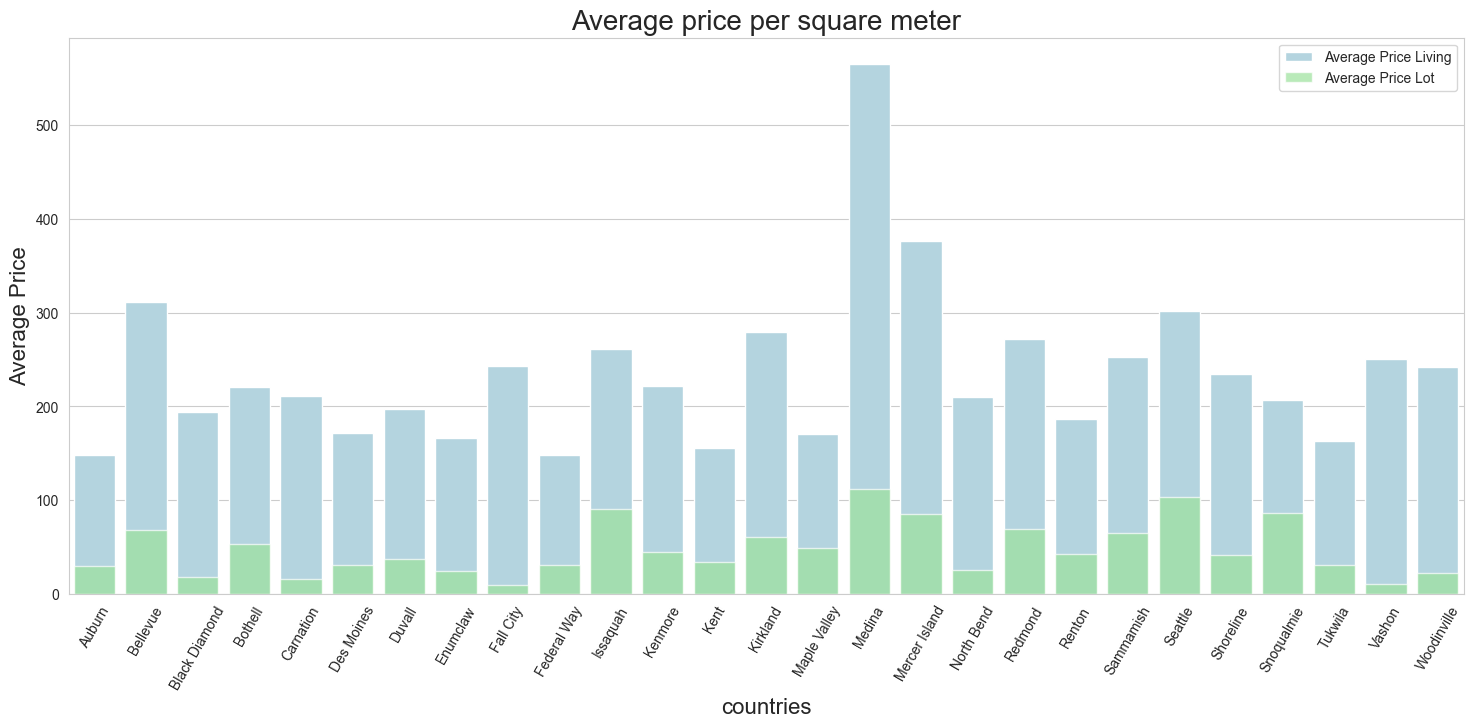

In [271]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
ax = sns.barplot(x='area', y='avg_price_living', data=df_avg_price_median, color='lightblue', label='Average Price Living')
sns.barplot(x='area', y='avg_price_lot', data=df_avg_price_median, color='lightgreen', label='Average Price Lot', alpha=0.7)
plt.title('Average Median price per square meter', fontsize=20)
plt.xlabel('countries', fontsize=16)
plt.ylabel('Average Price', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()


In [ ]:
df_avg_price.head()

,house_id,zipcode,sqft_living,avg_price_living,sqft_lot,avg_price_lot,lat,long,lat_rad,long_rad,cluster,lat_bin,long_bin
0,1000102,98002,222.967,116.667,870.780,29.873,47.326,-122.214,0.826,-2.133,0,16,-42
1,100100050,98155,122.632,208.333,1030.294,24.797,47.775,-122.304,0.834,-2.135,0,16,-42
2,1001200035,98188,125.419,201.815,740.716,34.172,47.432,-122.292,0.828,-2.134,0,16,-42
3,1001200050,98188,117.058,205.556,673.361,35.734,47.433,-122.292,0.828,-2.134,0,16,-42
4,1003000175,98188,91.045,225.510,706.620,29.056,47.436,-122.290,0.828,-2.134,0,16,-42


In [ ]:
df = df_avg_price

In [ ]:
df.head()

,house_id,zipcode,sqft_living,avg_price_living,sqft_lot,avg_price_lot,lat,long,lat_rad,long_rad,cluster,lat_bin,long_bin
0,1000102,98002,222.967,116.667,870.780,29.873,47.326,-122.214,0.826,-2.133,0,16,-42
1,100100050,98155,122.632,208.333,1030.294,24.797,47.775,-122.304,0.834,-2.135,0,16,-42
2,1001200035,98188,125.419,201.815,740.716,34.172,47.432,-122.292,0.828,-2.134,0,16,-42
3,1001200050,98188,117.058,205.556,673.361,35.734,47.433,-122.292,0.828,-2.134,0,16,-42
4,1003000175,98188,91.045,225.510,706.620,29.056,47.436,-122.290,0.828,-2.134,0,16,-42


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing the dataset
# If not, replace df with your DataFrame name

# Convert latitude and longitude to radians
df['lat_rad'] = np.radians(df['lat'])
df['long_rad'] = np.radians(df['long'])

# Define grid size
grid_size = 0.00008  # Adjust according to your preference

# Assign each point to a grid cell
df['lat_bin'] = (df['lat_rad'] / grid_size).astype(int)
df['long_bin'] = (df['long_rad'] / grid_size).astype(int)

# Calculate centroids of grid cells
centroids = df.groupby(['lat_bin', 'long_bin']).agg({'lat_rad': 'mean', 'long_rad': 'mean', 'avg_price_living': 'mean'}).reset_index()

# Convert centroids back to degrees
centroids['lat'] = np.degrees(centroids['lat_rad'])
centroids['long'] = np.degrees(centroids['long_rad'])

# Create the plot
fig = px.scatter_mapbox(centroids, lat='lat', lon='long', color='avg_price_living', size='avg_price_living',
                        color_continuous_scale='Viridis', size_max=10,
                        mapbox_style='carto-positron', zoom=9)

# Update layout
fig.update_layout(title='Geolocation Plot by Average Price per Living (Clustered)',
                  mapbox=dict(center=dict(lat=47.6, lon=-122.3)),
                  margin=dict(r=0, l=0, t=0, b=0))

# Show the plot
fig.show()





In [277]:
df_house_info.groupby('area')['zipcode'].nunique().sort_values()


area
Fall City         1
Medina            1
Maple Valley      1
Vashon            1
Kenmore           1
Shoreline         1
Snoqualmie        1
Mercer Island     1
North Bend        1
Duvall            1
Des Moines        1
Carnation         1
Bothell           1
Black Diamond     1
Tukwila           1
Enumclaw          1
Sammamish         2
Kirkland          2
Woodinville       2
Issaquah          2
Federal Way       2
Redmond           2
Auburn            3
Renton            4
Kent              4
Bellevue          5
Seattle          26
Name: zipcode, dtype: int64